## Assignment 7

### Task 1


$$ f(x) = x^TAx + 2b^Tx $$ 
$$ g(x) = x^Tx - 1 $$

$$ L(x, \lambda) = f(x) + \lambda g(x) $$
$$ \min \limits_{g(x)} f(x) = \min \limits_{x} \max \limits_{\lambda \ge 0} L(x, \lambda) $$
$$ \max \limits_{\lambda \ge 0} \min \limits_{x}  L(x, \lambda) = \max \limits_{\lambda \ge 0} g(x) $$
$$ g(\lambda) = \min \limits_{x} L(x, \lambda) $$
$$ A = A^T = \begin{pmatrix} -1 & 3 \\ 3 & -1 \end{pmatrix} \ b = \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

$$ L(x, \lambda) =  x^T(A+\lambda)x + 2b^Tx - \lambda $$
$$ \frac{\partial L}{\partial x} = 2(A+\lambda)x+2b = 0 $$
$$ A + \lambda > 0 $$
$$ x = -(A+\lambda)^{-1} b$$
$$ g(\lambda) = -b^T((A+\lambda)^{-1})^T(A+\lambda)(A+\lambda)^{-1}b - 2b^T(A+\lambda)^{-1}b-\lambda $$
$$ g(\lambda) = -b^T(A+\lambda)^{-1} - \lambda $$


$$ \begin{pmatrix} \lambda-1 & 3 \\ 3 & \lambda-1 \end{pmatrix}^{-1} = \frac{1}{(\lambda -1)^2 - 9} \begin{pmatrix} \lambda-1 & -3 \\ -3 & \lambda-1 \end{pmatrix}$$ 
$$ g(\lambda) = -\begin{pmatrix} 1 & 1 \end{pmatrix} \begin{pmatrix} \lambda-1 & 3 \\ 3 & \lambda-1 \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \frac{1}{(\lambda -1)^2 - 9} - \lambda $$
$$ g(\lambda) = -\frac{2\lambda-8}{\lambda^2-2\lambda-8} - \lambda $$

$$ A + \lambda > 0 $$
$$ \begin{vmatrix} \lambda-\mu-1 & 3 \\ 3 & \lambda-\mu-1 \end{vmatrix} = 0 $$
$$ \lambda_{1} = 4, \ \lambda_{2} = -2 $$
$$ \lambda > 4 $$

#### KKT 
1. $$ \frac{\partial L}{\partial x} = 0 \rightarrow (A + \lambda)x=-b$$
2. $$ h(x) \le 0 \rightarrow x^Tx \le 1 $$
3. $$ \lambda \ge 0 \rightarrow \lambda \ge 0 $$
4. $$ \lambda(x^Tx-1) = 0 $$

### Task 2

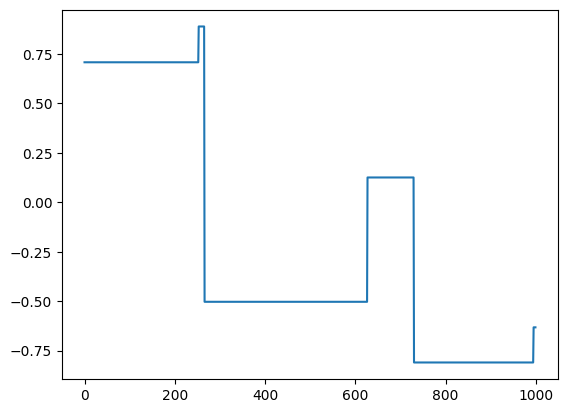

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

T = 1000
A = np.zeros(T)
level = np.random.uniform(-1, 1)

for t in range(T):
    if np.random.uniform(0, 1) > 0.99:
        level = np.random.uniform(-1,1)
    A[t] = level
plt.plot(A)

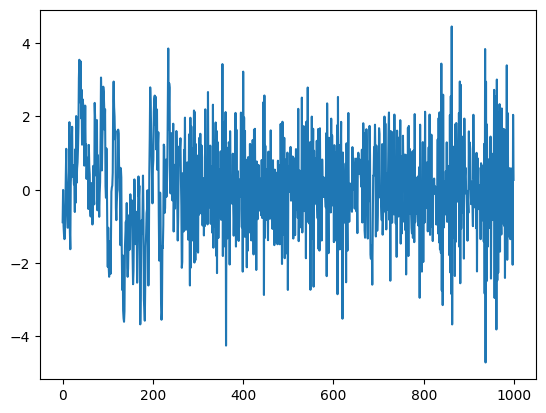

In [13]:
f = np.random.normal(size = T)

x = np.zeros(T)
x[0] = np.random.normal()
x[1] = np.random.normal()
for t in range(2, T):
    x[t] = A[t]*x[t-1] + f[t]
plt.plot(x)

In [31]:
gamma = 25
a = cp.Variable(T-2)
goal = cp.norm(cp.multiply(x[1:-1], a) - x[2:])**2
reg = cp.norm(a[1:]-a[:-1], 1)
prob = cp.Problem(cp.Minimize(goal+gamma*reg))
prob.solve()


1053.3698394916564

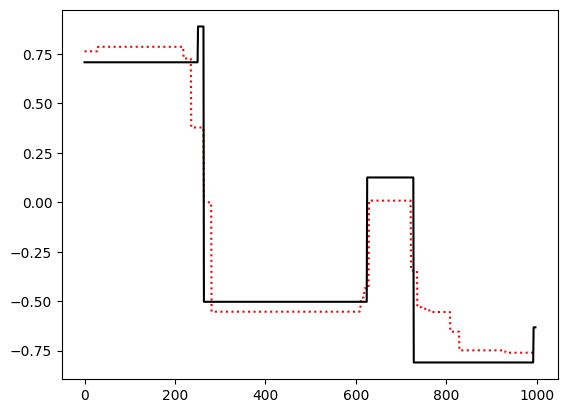

In [32]:
plt.plot(a.value, color = 'red', linestyle = ':')
plt.plot(A[2:], color = 'black')

In [35]:
print(f"Effective gamma estimation: {gamma}")

Effective gamma estimation: 25
